In [1]:
pip install qiskit-ignis

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7848\653509242.py:3: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, complete_meas_cal, tensored_meas_cal
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7848\653509242.py:20: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(qobj)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7848\653509242.py:26: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed

Original counts:
{'000': 498, '111': 502}
Mitigated counts:
{'000': 498.0000004465781, '011': 1.110299289379118e-16, '111': 501.9999995679608}


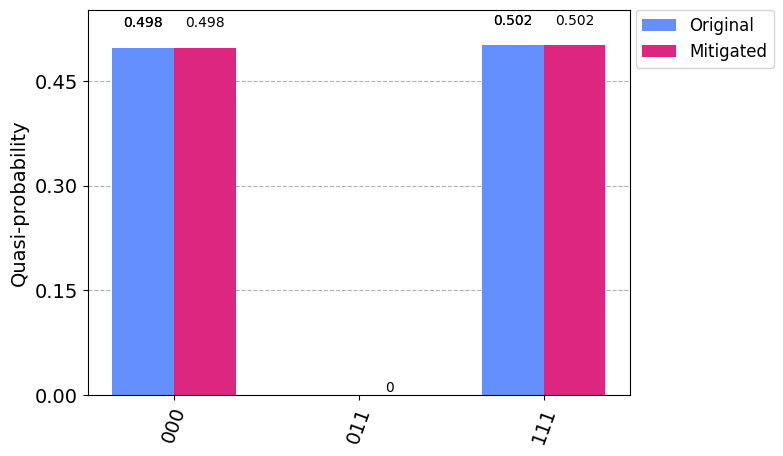

In [1]:
from qiskit import QuantumCircuit, assemble, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, complete_meas_cal, tensored_meas_cal

# Define the quantum circuit
qc = QuantumCircuit(3, 3)

# Apply gates and operations to the circuit
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0, 1, 2], [0, 1, 2])

# Transpile the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)

# Simulate the noisy circuit
qobj = assemble(transpiled_qc, shots=1000)
job = backend.run(qobj)
result = job.result()
counts = result.get_counts()

# Perform error mitigation
cal_circuits, state_labels = complete_meas_cal(qubit_list=[0, 1, 2])
cal_job = backend.run(assemble(cal_circuits, backend=backend))
cal_results = cal_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
mitigated_counts = meas_fitter.filter.apply(counts)

# Print the original counts
print("Original counts:")
print(counts)

# Print the mitigated counts
print("Mitigated counts:")
print(mitigated_counts)

# Plot the histograms of the original and mitigated counts
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])
